In [496]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error, explained_variance_score, max_error, d2_absolute_error_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor


In [497]:
df = pd.read_csv('PDMX.csv')

In [498]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [499]:
df = df[df['is_rated']==True]

In [500]:
df.head()

,path,metadata,has_metadata,version,is_user_pro,is_user_publisher,is_user_staff,has_paywall,is_rated,is_official,is_original,is_draft,has_custom_audio,has_custom_video,n_comments,n_favorites,n_views,n_ratings,rating,license,license_url,genres,groups,tags,song_name,title,subtitle,artist_name,composer_name,publisher,complexity,n_tracks,tracks,song_length,song_length.seconds,song_length.bars,song_length.beats,n_notes,notes_per_bar,n_annotations,has_annotations,n_lyrics,has_lyrics,n_tokens,pitch_class_entropy,scale_consistency,groove_consistency,best_path,is_best_path,best_arrangement,is_best_arrangement,best_unique_arrangement,is_best_unique_arrangement,subset:all,subset:rated,subset:deduplicated,subset:rated_deduplicated
0,./data/b/b/QmbbGKtZ9G6DkWxvSeU516c1ktWiFJmEbHG...,./metadata/5/5740212.json,True,3.01,True,False,False,False,True,False,False,False,False,False,0,2,97,3,4.66,publicdomain,https://creativecommons.org/publicdomain/mark/...,classical,NaN,NaN,I shall be no stranger there,I shall be no stranger there - William J. Kirk...,NaN,William J. Kirkpatrick,William James Kirkpatrick,NaN,0,2,0-0,33120,41.399917,26,71,360,13.846154,4,True,174,True,538,2.772587,0.960784,0.835784,/data2/zachary/musescore/data/b/b/QmbbGKtZ9G6D...,True,/data2/zachary/musescore/data/b/b/QmbbGKtZ9G6D...,True,/data2/zachary/musescore/data/b/b/QmbbGKtZ9G6D...,True,True,True,True,True
26,./data/b/b/QmbbNbvHZ8SL65ghemEtVrQjwsRHnU5nviR...,./metadata/7/5923270.json,True,3.01,False,False,False,False,True,False,True,False,False,False,1,14,280,8,4.81,cc-zero,https://creativecommons.org/publicdomain/zero/...,NaN,NaN,NaN,Crimson Peak - Edith's Theme,Crimson Peak - Edith's Theme,NaN,Falathar,Fernando Velazquez,NaN,0,5,0-42-43-48-48,54720,74.347988,51,153,651,12.764706,73,True,0,False,724,3.032415,0.910906,0.955518,/data2/zachary/musescore/data/V/Z/QmVZQnaZWQuy...,False,/data2/zachary/musescore/data/b/b/QmbbNbvHZ8SL...,True,/data2/zachary/musescore/data/b/b/QmbbNbvHZ8SL...,True,True,True,True,True
36,./data/b/b/QmbbxamvE2jmNJ4tfS3wHditr6Zdmyc38ZA...,./metadata/2/5942125.json,True,3.01,True,False,False,False,True,False,False,False,False,False,3,12,977,15,4.72,cc-zero,https://creativecommons.org/publicdomain/zero/...,rock,NaN,NaN,california blue,california-blue,Partituras sencillas de arcamusical.com para a...,Roy Orbison,NaN,NaN,0,1,21,195840,204.000000,102,408,952,9.333333,1,True,0,False,953,2.737305,0.997899,0.976511,/data2/zachary/musescore/data/b/b/QmbbxamvE2jm...,True,/data2/zachary/musescore/data/b/b/QmbbxamvE2jm...,True,/data2/zachary/musescore/data/b/b/QmbbxamvE2jm...,True,True,True,True,True
54,./data/b/b/QmbbSKXAnE9SeL2o6hhUyBRSa3D6dBYb9JW...,./metadata/9/3457121.json,True,2.06,True,False,False,False,True,False,False,False,False,False,0,5,316,7,4.70,cc-zero,https://creativecommons.org/publicdomain/zero/...,NaN,NaN,NaN,NaN,Under the Boardwalk,NaN,NaN,Artie Resnick and Kenny Young,NaN,0,1,73,103200,107.500000,54,216,224,4.148148,1,True,0,False,225,2.705839,0.991071,0.900157,/data2/zachary/musescore/data/W/s/QmWsPzL2dCoe...,False,/data2/zachary/musescore/data/b/b/QmbbSKXAnE9S...,True,/data2/zachary/musescore/data/b/b/QmbbSKXAnE9S...,True,True,True,True,True
56,./data/b/b/Qmbbkk1aZVb6JBnvzqoU8Haz6DrcYLRCtiL...,./metadata/6/4609940.json,True,3.01,True,False,False,False,True,False,False,False,False,False,0,6,194,3,4.16,publicdomain,https://creativecommons.org/publicdomain/mark/...,NaN,NaN,NaN,The Rattlin' Bog,the Rattlin' Bog,NaN,Misc tunes,NaN,NaN,1,1,0,30720,64.000000,18,34,72,4.000000,3,True,0,False,75,2.436905,1.000000,0.972656,/data2/zachary/musescore/data/Y/T/QmYTrMnu1wWn...,False,/data2/zachary/musescore/data/a/a/QmaahMHX51Jm...,False,/data2/zachary/musescore/data/a/a/QmaahMHX51Jm...,False,True,True,False,False


In [501]:
df_dropped = df[['n_comments', 'n_favorites', 'n_views', 'n_ratings', 'rating', 'genres', 'song_name', 'artist_name', 'complexity', 'n_tracks', 'song_length.seconds', 'n_notes', 'n_annotations', 'n_lyrics', 'has_lyrics', 'n_tokens']]

In [502]:
df_dropped = df_dropped.dropna()

In [503]:
df_dropped = df_dropped.drop_duplicates()
df_dropped.head()

,n_comments,n_favorites,n_views,n_ratings,rating,genres,song_name,artist_name,complexity,n_tracks,song_length.seconds,n_notes,n_annotations,n_lyrics,has_lyrics,n_tokens
0,0,2,97,3,4.66,classical,I shall be no stranger there,William J. Kirkpatrick,0,2,41.399917,360,4,174,True,538
36,3,12,977,15,4.72,rock,california blue,Roy Orbison,0,1,204.000000,952,1,0,False,953
75,3,7,553,13,4.87,classical,Die schöne Müllerin D.795,Franz Schubert,0,2,93.272897,1407,71,137,True,1615
83,0,0,60,3,4.83,classical,Victoria Christe resurgenti,François Couperin,0,4,120.000000,1359,19,596,True,1974
85,4,53,2381,10,4.69,worldmusic-folk,Meu Caro Amigo,Chico Buarque,2,1,69.000000,1078,6,0,False,1084


In [504]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [505]:
df_dropped['genres_label'] = le.fit_transform(df_dropped['genres'])
df_dropped['artist_name_label'] = le.fit_transform(df_dropped['artist_name'])
df_dropped['song_name_label'] = le.fit_transform(df_dropped['song_name'])

In [506]:
df_dropped = df_dropped[(df_dropped['song_length.seconds']>0) & (df_dropped['song_length.seconds']<1200)]

In [507]:
df_dropped.head()

,n_comments,n_favorites,n_views,n_ratings,rating,genres,song_name,artist_name,complexity,n_tracks,song_length.seconds,n_notes,n_annotations,n_lyrics,has_lyrics,n_tokens,genres_label,artist_name_label,song_name_label
0,0,2,97,3,4.66,classical,I shall be no stranger there,William J. Kirkpatrick,0,2,41.399917,360,4,174,True,538,3,2561,1749
36,3,12,977,15,4.72,rock,california blue,Roy Orbison,0,1,204.000000,952,1,0,False,953,88,2133,4707
75,3,7,553,13,4.87,classical,Die schöne Müllerin D.795,Franz Schubert,0,2,93.272897,1407,71,137,True,1615,3,809,1074
83,0,0,60,3,4.83,classical,Victoria Christe resurgenti,François Couperin,0,4,120.000000,1359,19,596,True,1974,3,816,4225
85,4,53,2381,10,4.69,worldmusic-folk,Meu Caro Amigo,Chico Buarque,2,1,69.000000,1078,6,0,False,1084,129,436,2445


In [508]:
len(df_dropped)

9945

<Axes: xlabel='rating', ylabel='Count'>

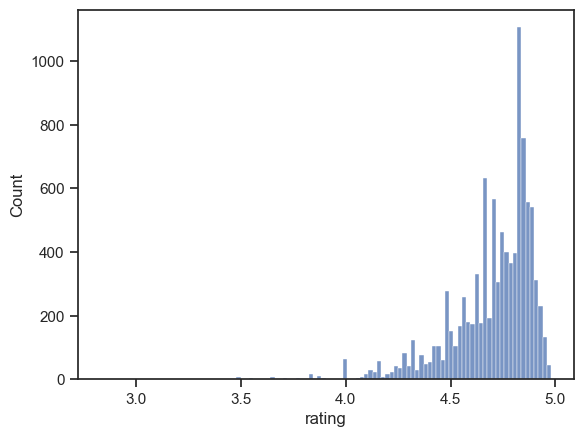

In [509]:
sns.histplot(data=df_dropped, x='rating')

<Axes: xlabel='song_length.seconds', ylabel='Count'>

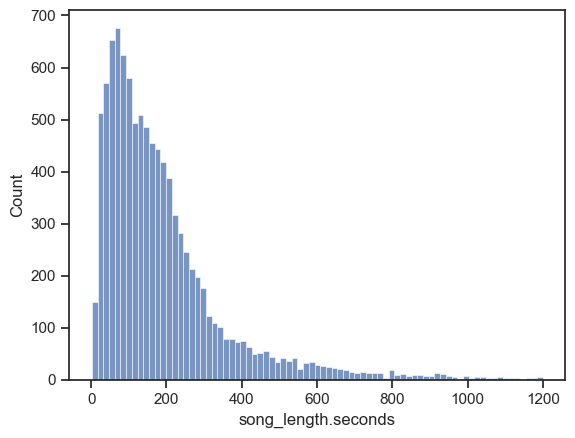

In [510]:
sns.histplot(data=df_dropped, x='song_length.seconds')

In [511]:
df_dropped = df_dropped.drop(['genres', 'song_name', 'artist_name'], axis = 1)

<Axes: xlabel='n_views', ylabel='rating'>

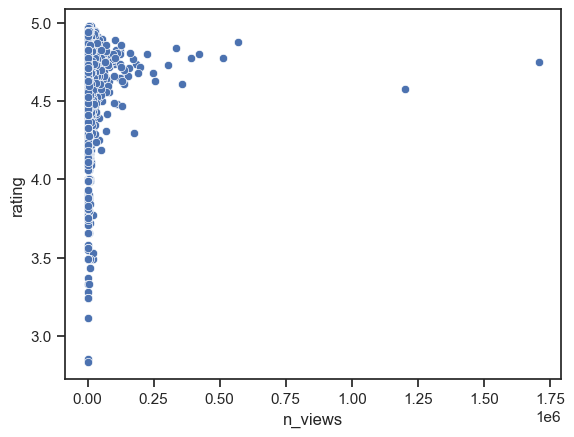

In [512]:
sns.scatterplot(data=df_dropped, x="n_views", y='rating')

### BASELINE

In [513]:
baseline = df_dropped['rating'][:int(len(df_dropped)*.8)].mean()

In [514]:
python_data = df_dropped.to_dict(orient='records')

In [515]:
pred = [baseline] * len(python_data)
y = [d['rating'] for d in python_data]

In [516]:
mse = mean_squared_error(y_true=y, y_pred=pred)
r2 = r2_score(y_true=y, y_pred=pred)
rmse = root_mean_squared_error(y_true=y, y_pred=pred)
mae = mean_absolute_error(y_true=y, y_pred=pred)

print("MSE: ", + mse)
print("RMSE: ", + rmse)
print("MAE: ", + mae)
print("R2: ", + r2)

MSE:  0.04200020360347925
RMSE:  0.2049395120602156
MAE:  0.15107933149668554
R2:  -9.629395503196747e-09


### RANDOM FOREST

In [517]:
df_dropped.head()

,n_comments,n_favorites,n_views,n_ratings,rating,complexity,n_tracks,song_length.seconds,n_notes,n_annotations,n_lyrics,has_lyrics,n_tokens,genres_label,artist_name_label,song_name_label
0,0,2,97,3,4.66,0,2,41.399917,360,4,174,True,538,3,2561,1749
36,3,12,977,15,4.72,0,1,204.000000,952,1,0,False,953,88,2133,4707
75,3,7,553,13,4.87,0,2,93.272897,1407,71,137,True,1615,3,809,1074
83,0,0,60,3,4.83,0,4,120.000000,1359,19,596,True,1974,3,816,4225
85,4,53,2381,10,4.69,2,1,69.000000,1078,6,0,False,1084,129,436,2445


In [518]:
def feat(datum):
    return [
        1,  # A constant value
        (datum['n_comments']),
        (datum['n_favorites']),
        (datum['n_views']),
        (datum['n_ratings']),
        datum['complexity'],
        datum['n_tracks'],
        (datum['song_length.seconds']),
        (datum['n_notes']),
        datum['n_annotations'],
        datum['n_lyrics'],
        datum['has_lyrics'],
        datum['genres_label'],
        datum['artist_name_label'],
        datum['song_name_label']
    ]

In [519]:
X = [feat(d) for d in python_data]
y = [d['rating'] for d in python_data]

In [520]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.datasets import make_regression

In [521]:
# Step 1: Feature selection using SelectKBest with f_regression
selector = SelectKBest(f_regression, k=6)  # You can specify a value for k or use 'all' for all features
X_new = selector.fit_transform(X, y)

# Step 2: Get the selected features (top k)
selected_features = selector.get_support(indices=True)  # Indices of the selected features
print("Selected feature indices:", selected_features)

# Step 3: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Optional: If you want to know which features are selected based on their importance
scores = selector.scores_
print("Feature scores:", scores)

Selected feature indices: [ 5  7  8  9 12 14]
Feature scores: [0.00000000e+00 4.42367376e+00 1.72858593e+00 2.34001578e-01
 1.49197924e+01 1.24350526e+02 5.89155590e+00 1.38123230e+02
 1.20107346e+02 5.00493221e+01 4.67880824e-02 1.06093324e+00
 1.11904745e+02 2.05606803e-02 1.39034109e+02]


In [522]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [523]:
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)

y_pred = rf_regressor.predict(X_test)

### EVALUATE
mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
r2 = r2_score(y_true=y_test, y_pred=y_pred)
rmse = root_mean_squared_error(y_true=y_test, y_pred=y_pred)
mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)

print("MSE: ", + mse)
print("RMSE: ", + rmse)
print("MAE: ", + mae)
print("R2: ", + r2)

MSE:  0.04459691337727258
RMSE:  0.2111798129018789
MAE:  0.15899142210730416
R2:  -0.014790475982083828


### GRADIENT BOOSTING

In [524]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(random_state=42)

# Train the model
gbr.fit(X_train, y_train)

# Make predictions
y_pred = gbr.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
r2 = r2_score(y_true=y_test, y_pred=y_pred)
rmse = root_mean_squared_error(y_true=y_test, y_pred=y_pred)
mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)

print("MSE: ", + mse)
print("RMSE: ", + rmse)
print("MAE: ", + mae)
print("R2: ", + r2)

MSE:  0.04172778771594975
RMSE:  0.20427380575088366
MAE:  0.15337397410826917
R2:  0.05049568790274672


### LINEAR REGRESSION

In [525]:
from sklearn.linear_model import LinearRegression

# Initialize Linear Regression model
lr = LinearRegression()

# Train the model
lr.fit(X_train, y_train)

# Make predictions
y_pred = lr.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
r2 = r2_score(y_true=y_test, y_pred=y_pred)
rmse = root_mean_squared_error(y_true=y_test, y_pred=y_pred)
mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)

print("MSE: ", + mse)
print("RMSE: ", + rmse)
print("MAE: ", + mae)
print("R2: ", + r2)

MSE:  0.041904838365156356
RMSE:  0.20470671304370153
MAE:  0.150299764132406
R2:  0.04646694916333283


### SVR

In [526]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler


# Feature scaling (SVR is sensitive to feature scaling)
scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Initialize SVR model
svr = SVR(kernel='rbf')  # You can also try 'linear' or 'poly' kernels

# Train the model
svr.fit(X_train, y_train)  # .ravel() to make y_train a 1D array

# Make predictions on the test set
y_pred = svr.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
r2 = r2_score(y_true=y_test, y_pred=y_pred)
rmse = root_mean_squared_error(y_true=y_test, y_pred=y_pred)
mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)

print("MSE: ", + mse)
print("RMSE: ", + rmse)
print("MAE: ", + mae)
print("R2: ", + r2)

MSE:  0.042141505090812874
RMSE:  0.20528396208864655
MAE:  0.1456610856698434
R2:  0.041081663030492654


### MLP REGRESSOR

In [527]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)

# Make predictions on the test set
y_pred = mlp.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
r2 = r2_score(y_true=y_test, y_pred=y_pred)
rmse = root_mean_squared_error(y_true=y_test, y_pred=y_pred)
mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)

print("MSE: ", + mse)
print("RMSE: ", + rmse)
print("MAE: ", + mae)
print("R2: ", + r2)

MSE:  0.04251134779279969
RMSE:  0.20618280188415253
MAE:  0.1530582339961514
R2:  0.03266599425062211


### XGBOOST

In [528]:
import xgboost as xgb

In [529]:
#=========================================================================
# XGBoost regression: 
# Parameters: 
# n_estimators  "Number of gradient boosted trees. Equivalent to number 
#                of boosting rounds."
# learning_rate "Boosting learning rate (also known as “eta”)"
# max_depth     "Maximum depth of a tree. Increasing this value will make 
#                the model more complex and more likely to overfit." 
#=========================================================================
regressor=xgb.XGBRegressor(eval_metric='rmsle')

#=========================================================================
# exhaustively search for the optimal hyperparameters
#=========================================================================
from sklearn.model_selection import GridSearchCV
# set up our search grid
param_grid = {"max_depth":    [4, 5, 6],
              "n_estimators": [500, 600, 700],
              "learning_rate": [0.01, 0.015]}

# try out every combination of the above values
search = GridSearchCV(regressor, param_grid, cv=5).fit(X_train, y_train)

print("The best hyperparameters are ",search.best_params_)

The best hyperparameters are  {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 500}


In [530]:
regressor=xgb.XGBRegressor(learning_rate = search.best_params_["learning_rate"],
                           n_estimators  = search.best_params_["n_estimators"],
                           max_depth     = search.best_params_["max_depth"],
                           eval_metric='rmsle')

regressor.fit(X_train, y_train)

#=========================================================================
# To use early_stopping_rounds: 
# "Validation metric needs to improve at least once in every 
# early_stopping_rounds round(s) to continue training."
#=========================================================================
# first perform a test/train split 
#from sklearn.model_selection import train_test_split

#X_train,X_test,y_train,y_test = train_test_split(X_train,y_train, test_size = 0.2)
#regressor.fit(X_train, y_train, early_stopping_rounds=6, eval_set=[(X_test, y_test)], verbose=False)

#=========================================================================
# use the model to predict the prices for the test data
#=========================================================================
y_pred = regressor.predict(X_test)

In [531]:
mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
r2 = r2_score(y_true=y_test, y_pred=y_pred)
rmse = root_mean_squared_error(y_true=y_test, y_pred=y_pred)
mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)

print("MSE: ", + mse)
print("RMSE: ", + rmse)
print("MAE: ", + mae)
print("R2: ", + r2)

MSE:  0.0412645505696141
RMSE:  0.2031367779837371
MAE:  0.15350999001703888
R2:  0.06103640794754028
